<a href="https://colab.research.google.com/github/HGOYALMQF27/Portfolio-Optimization/blob/main/Optimization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas-datareader

In [ ]:
pip install pulp

In [ ]:
pip install yfinance

In [ ]:
pip install PyPortfolioOpt

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pandas_datareader import data
from pulp import *
from datetime import date
from dateutil.relativedelta import relativedelta
from pypfopt import expected_returns
from pypfopt import EfficientFrontier


In [ ]:
ticker = [
'AAPL',
'AMGN',
'AXP',
'BA',
'CAT',
'CRM',
'CSCO',
'CVX',
'DIS',
'DOW',
'GS',
'HD',
'HON',
'IBM',
'INTC',
'JPM',
'KO',
'MCD',
'MMM',
'MRK',
'MSFT',
'NKE',
'PG',
'TRV',
'UNH',
'V',
'WBA',
'WMT',
'^DJI']

In [ ]:
today = datetime.today().strftime('%Y-%m-%d')
initial_date = pd.to_datetime(today)+pd.DateOffset(years= -5)
df_prices = pd.DataFrame()

In [ ]:
def datafromYahoo(dataframe,ticker_list,start,finish):
    for i in ticker_list:
        current_ticker = yf.Ticker(i)
        dataframe[i] = (current_ticker.history(period='5y')[['Close']])
    return dataframe
df = datafromYahoo(df_prices,ticker,initial_date,today)

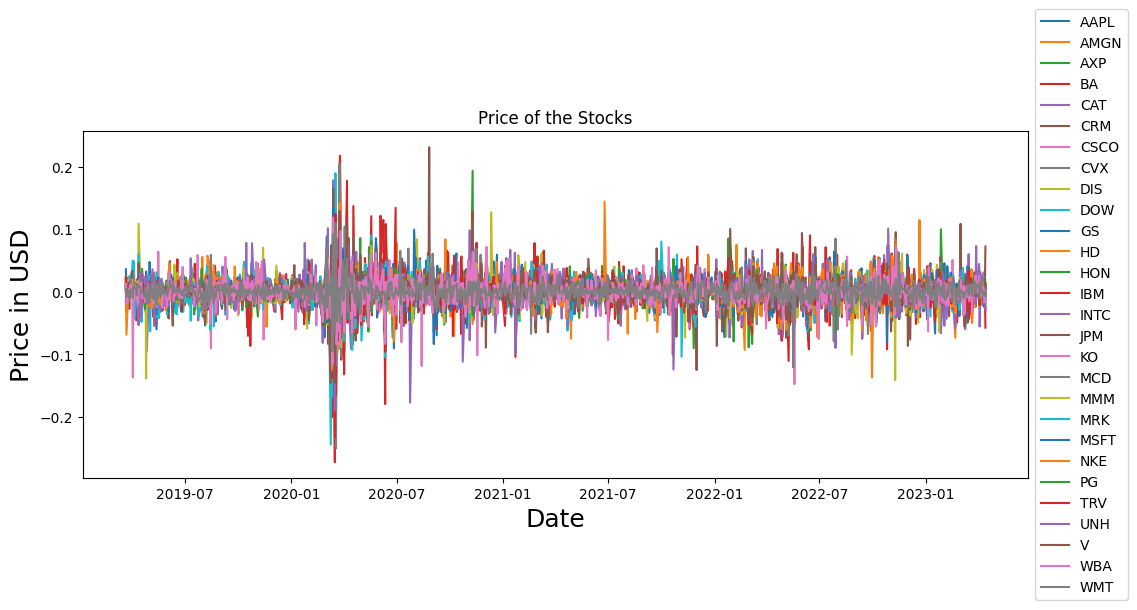

In [ ]:
plt.figure(figsize=(12.2,4.5))
for i in df.columns.values:
    if i!='^DJI':
      plt.plot( df[i],  label=i)
plt.title('Price of the Stocks')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price in USD',fontsize=18)
plt.legend(df.columns.values)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
df = np.log(df).diff()
df = df.dropna()
df

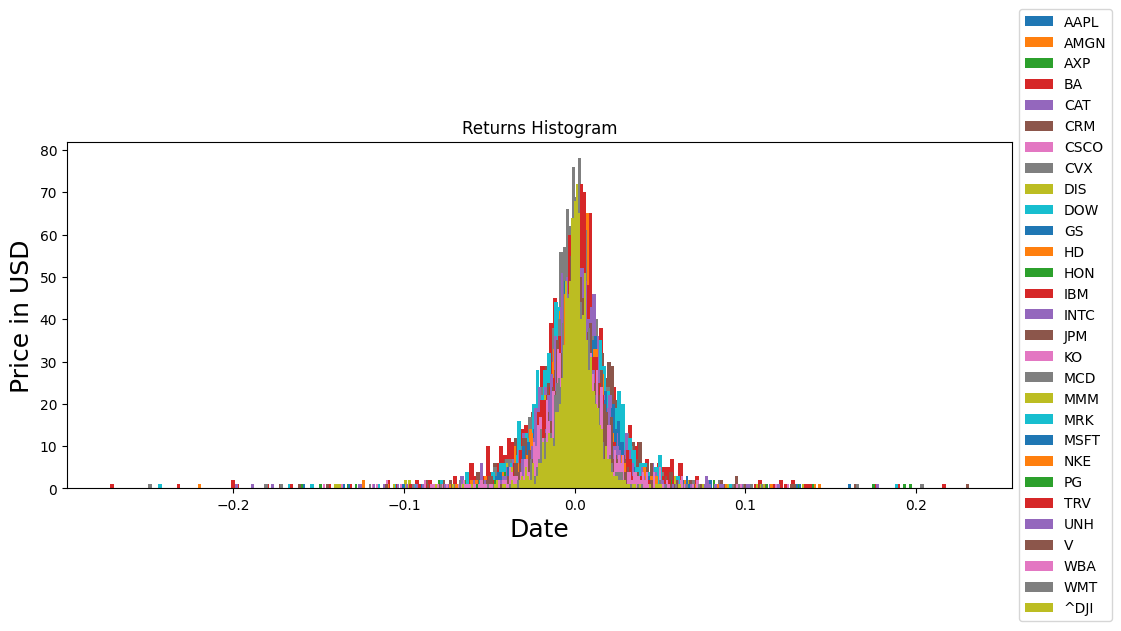

In [ ]:
plt.figure(figsize=(12.2,4.5))
for i in df.columns.values:
    plt.hist( df[i],  label=i, bins = 200)
plt.title('Returns Histogram')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price in USD',fontsize=18)
plt.legend(df.columns.values)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
df_ticker =  df.loc[:, df.columns != '^DJI']
df_benchmark =  df.loc[:, df.columns == '^DJI']

In [ ]:
returns = expected_returns.capm_return(df_ticker, market_prices = df_benchmark, returns_data= True, risk_free_rate=0.045, frequency=252,log_returns=True)
returns

In [ ]:
df_cov = df_ticker.cov()*252
df_cov

In [ ]:
def weightofPortfolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal

weights = weightofPortfolio(df_ticker)

In [ ]:
portfolio_variance = weights.T @ df_cov @weights
"The variance of the portfolio is:" + " " + str(round(portfolio_variance*100,1))+"%"

'The variance of the portfolio is: 5.3%'

In [ ]:
portfolio_volatility = np.sqrt(portfolio_variance)
"The volatility of the portfolio is:" + " " + str(round(portfolio_volatility*100,1))+"%"

'The volatility of the portfolio is: 23.0%'

In [ ]:
portfolio_return = np.sum(weights*returns)
'The expected annual return of the portfolio is:' + ' ' + str(round(portfolio_return*100,3)) + '%'

'The expected annual return of the portfolio is: 4.248%'

In [ ]:
ef = EfficientFrontier(returns, df_cov, weight_bounds=(-1,1))
new_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', -0.0157), ('AMGN', 0.09145), ('AXP', -0.09255), ('BA', -0.03099), ('CAT', 0.07237), ('CRM', 0.04544), ('CSCO', -0.02776), ('CVX', 0.02292), ('DIS', 0.06998), ('DOW', -0.08281), ('GS', 0.02054), ('HD', -0.06268), ('HON', 0.00428), ('IBM', 0.04943), ('INTC', -0.01155), ('JPM', -0.02626), ('KO', 0.17485), ('MCD', 0.16437), ('MMM', 0.09912), ('MRK', 0.18448), ('MSFT', -0.06039), ('NKE', 0.0299), ('PG', 0.10032), ('TRV', 0.03439), ('UNH', -0.02763), ('V', -0.00047), ('WBA', 0.00457), ('WMT', 0.27038)])
Expected annual return: 4.4%
Annual volatility: 16.8%
Sharpe Ratio: 0.14


(0.04365333189380987, 0.16782718806633823, 0.1409386176717699)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df_ticker)
stock_weights = cleaned_weights
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=500000)
allocation, leftover = da.lp_portfolio()
print("Quantities of Stock To buy:", allocation)
print("Money leftover: ${:.2f}".format(leftover))

Quantities of Stock To buy: {'CAT': 8388608, 'CRM': 7989482, 'CVX': 6426267, 'GS': 7394003, 'HON': 5440712, 'IBM': 8021797, 'KO': 1954404, 'MCD': 4202426, 'MRK': 627133, 'AXP': -5204080, 'BA': -1, 'CSCO': -335, 'DOW': -1348589, 'HD': -2400813, 'INTC': -10, 'JPM': -2547582, 'MSFT': -6, 'UNH': -3, 'V': -2489066}
Money leftover: $252261.56


In [ ]:
allocation.values()

dict_values([8388608, 7989482, 6426267, 7394003, 5440712, 8021797, 1954404, 4202426, 627133, -5204080, -1, -335, -1348589, -2400813, -10, -2547582, -6, -3, -2489066])

In [ ]:
cleaned_weights.values()

odict_values([-0.0157, 0.09145, -0.09255, -0.03099, 0.07237, 0.04544, -0.02776, 0.02292, 0.06998, -0.08281, 0.02054, -0.06268, 0.00428, 0.04943, -0.01155, -0.02626, 0.17485, 0.16437, 0.09912, 0.18448, -0.06039, 0.0299, 0.10032, 0.03439, -0.02763, -0.00047, 0.00457, 0.27038])

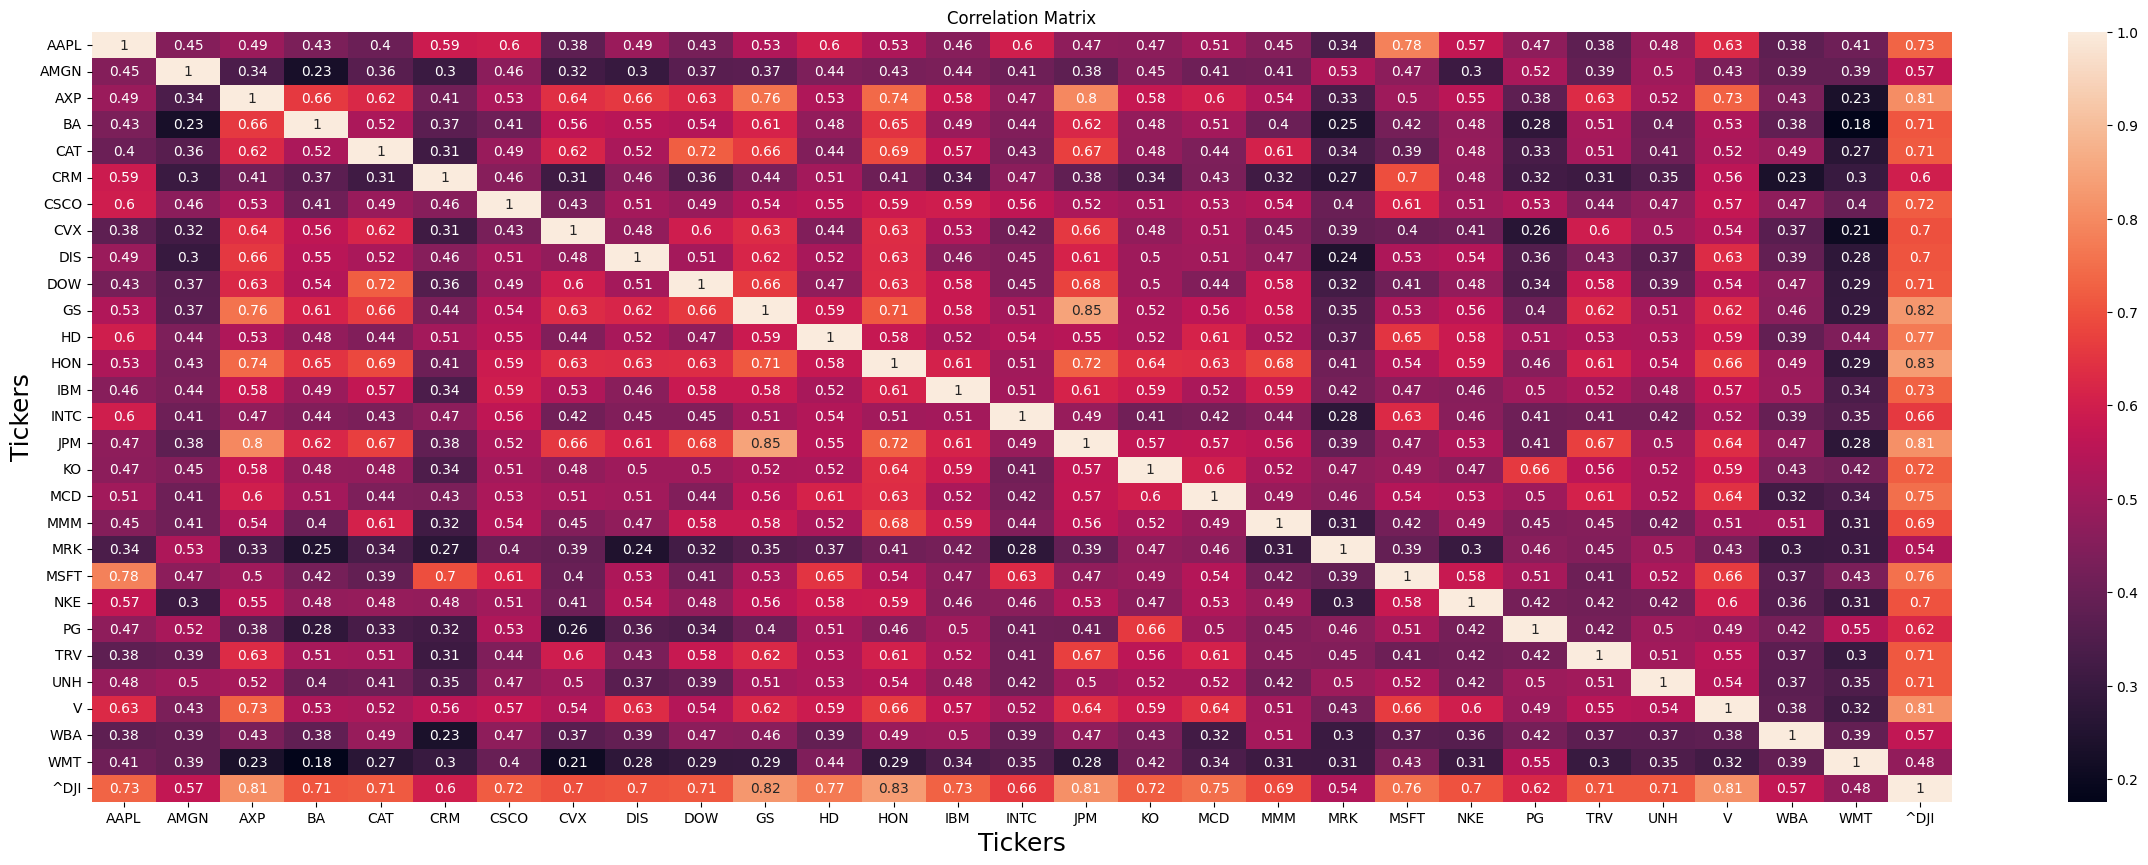

In [ ]:
correlation_mat = df.corr()
plt.figure(figsize=(30,10))
sns.heatmap(correlation_mat, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Tickers',fontsize=18)
plt.ylabel('Tickers',fontsize=18)
plt.show()